In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
round6_tires = {
# "hoosier_LCO_16x6.0-10_10x7":{"long":None, "lat":None},
"hoosier_r25b_16x7.5_10x7":{"long":None, "lat":None},
"hoosier_LCO_16x7.5-10_10x7":{"long":None, "lat":None}
}

In [7]:
camber = 0 # default camber
pressure = 12 * 6.89476 # default pressure
velocity = 25 * 1.60934 # default velocity
slip_angle = 0
slip_ratio = 0
run_num = 1

In [8]:
for name, tire in round6_tires.items():

    try:
        df = pd.read_csv(f"../tire_data/processed_data/all_tires/cornering_{name}.csv")
        tire["lat"] = df[(df["velocity"] == velocity) & (df["pressure"] == pressure) & (df["SR"] < 1) & (df["SR"] > -1) & (df["camber"] == camber)]

    except:
        print("Error getting lateral data for {0}".format(name))

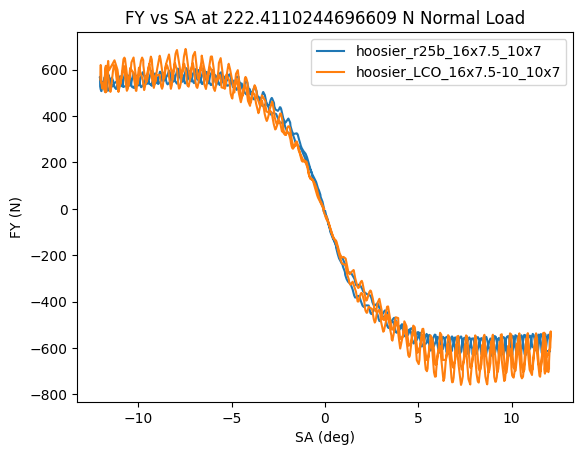

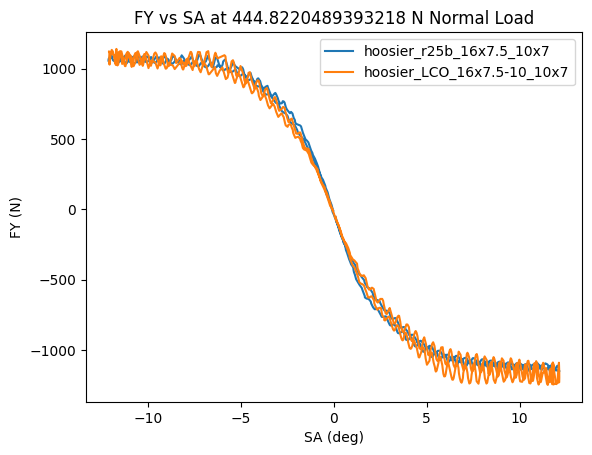

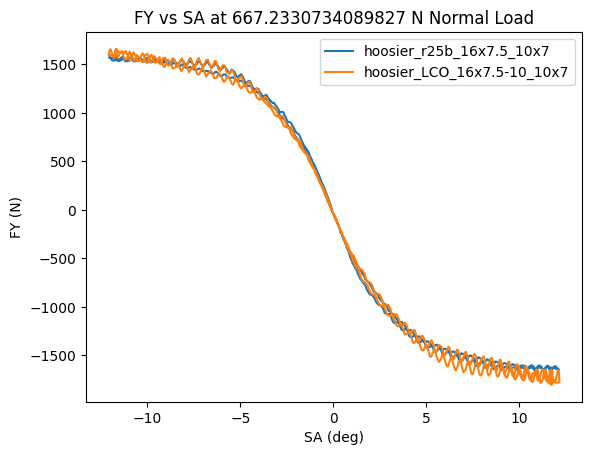

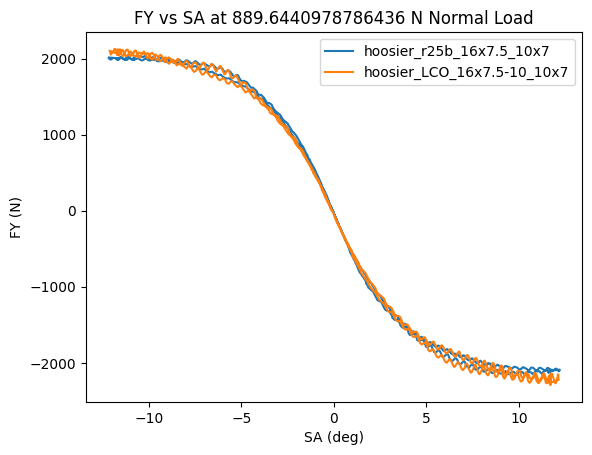

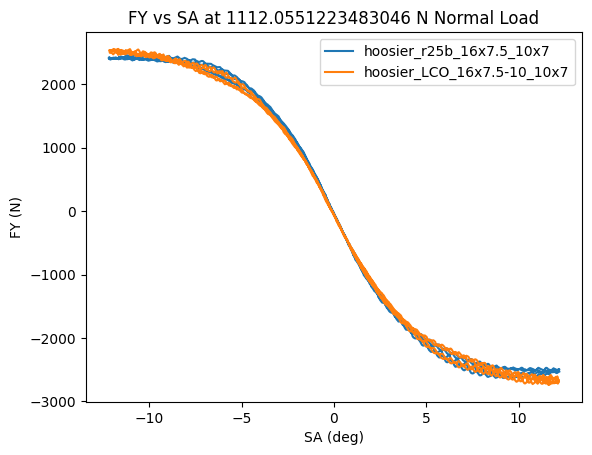

In [13]:
tire_lst = []
loads = set()

for name, tire in round6_tires.items():
    normal = tire["lat"]["load"].unique().tolist()

    for item in normal:
        loads.add(item)

for item in loads:
    plt.figure()
    for name, tire in round6_tires.items():
        if name == "hoosier_r25b_16x7.5_10x7":
            temp = tire["lat"][tire["lat"]["load"] == item]
            plt.plot(temp["SA"], temp["FY"] * 0.96)
            tire_lst.append(name)
        else:
            temp = tire["lat"][tire["lat"]["load"] == item]
            plt.plot(temp["SA"], temp["FY"])
            tire_lst.append(name)

        plt.title(f"FY vs SA at {item * -1} N Normal Load")
        plt.xlabel("SA (deg)")
        plt.ylabel("FY (N)")

    plt.legend(tire_lst)